## Miembros:
# Cristian Felipe Molina Arango
# Nicolas Martínez Rubio
# Sebastián Correa Villada

# Proyecto de curso de Analítica de Datos 
Se propone el análisis del dataset que contiene las estadísticas avanzadas de rendimiento de jugadores de
baloncesto en la NBA durante la temporada 2017-2018, así como los salarios de los mismos.

# Exploracion de los datos

Importamos las librerías que vamos a utilizar

In [79]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
pd.set_option('display.float_format', lambda x: '%.2f' % x)

Ignoramos los warnings debido a que no son importantes para lo que se pretende

In [80]:
import warnings
warnings.filterwarnings('ignore')

Cargamos los datos con los que vamos a trabajar y conocemos su estructura

In [81]:
salaries = pd.read_csv("2017-18_NBA_salary.csv")
salaries.shape

(485, 28)

El dataset consta de 485 registros con 28 columnas. Vemos los primeros 15 registros del dataset

In [82]:
salaries.head(15)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.60,0.30,0.59,0.37,6.50,16.80,11.70,1.50,1.10,6.80,18.20,19.50,-0.40,0.10,-0.20,-0.12,-10.60,0.50,-10.10,-0.20
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.80,0.61,0.00,0.34,11.00,25.00,18.50,15.40,1.90,1.30,19.30,17.20,1.70,1.40,3.10,0.16,-0.60,1.30,0.80,0.70
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.30,0.53,0.19,0.14,7.00,23.80,15.00,14.90,1.40,0.60,12.50,27.60,0.30,1.10,1.40,0.05,-0.60,-1.30,-1.90,0.00
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.60,0.50,0.35,0.30,1.40,14.40,7.70,18.60,1.80,0.50,9.70,29.50,-0.10,0.50,0.40,0.03,-0.70,-2.00,-2.60,-0.10
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.20,0.49,0.39,0.15,4.90,18.30,11.70,7.30,0.80,2.50,15.60,15.50,-0.40,1.20,0.80,0.04,-3.70,0.90,-2.90,-0.20
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.50,0.54,0.49,0.14,1.30,11.30,6.10,13.30,1.40,0.30,9.10,17.00,1.60,1.60,3.10,0.07,-0.40,-0.50,-0.90,0.60
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.90,0.00,0.67,0.00,15.90,15.40,15.70,0.00,7.20,0.00,0.00,19.20,-0.10,0.00,0.00,-0.25,-12.60,-0.70,-13.30,0.00
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.90,0.32,0.33,0.21,0.00,5.00,2.50,23.20,2.60,2.40,19.30,21.70,-0.50,0.10,-0.40,-0.17,-8.70,-1.90,-10.60,-0.30
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.10,0.54,0.39,0.19,5.00,14.00,9.50,9.70,0.90,1.40,12.00,14.60,2.00,1.00,3.10,0.07,-0.40,-0.60,-1.00,0.50
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.60,0.59,0.07,0.56,13.60,25.20,19.30,11.00,1.80,2.80,15.40,21.70,0.80,0.60,1.40,0.16,-0.10,0.60,0.50,0.30


Vemos las etiquetas de columna y sus correspondientes tipos de variables

In [83]:
salaries.dtypes

Player              object
Salary               int64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
VORP               float64
dtype: object

## Análisis de calidad
Veremos si hay datos con valores faltantes o si hay filas repetidas

In [84]:
print(salaries.isna().sum())
print("Número de filas repetidas:", salaries.size-salaries.drop_duplicates().size)

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                2
3PAr               2
FTr                2
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               2
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
dtype: int64
Número de filas repetidas: 0


## Resumen estadístico
Veremos un resumen de estadísticas descriptivas

In [85]:
salaries.select_dtypes(include="object").describe(include="all").T

,count,unique,top,freq
Player,485,483,Kay Felder,3
NBA_Country,485,44,USA,374
Tm,485,31,TOT,55


In [86]:
salaries.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,485.00,6636507.50,7392601.91,46080.00,1471382.00,3202217.00,10000000.00,34682550.00
NBA_DraftNumber,485.00,29.45,21.13,1.00,11.00,25.00,47.00,62.00
Age,485.00,26.26,4.27,19.00,23.00,26.00,29.00,41.00
G,485.00,50.17,24.87,1.00,29.00,59.00,71.00,79.00
MP,485.00,1154.14,811.36,1.00,381.00,1134.00,1819.00,2898.00
PER,485.00,13.26,8.77,-41.10,9.80,13.20,16.50,134.10
TS%,483.00,0.54,0.11,0.00,0.51,0.55,0.58,1.50
3PAr,483.00,0.34,0.23,0.00,0.17,0.35,0.48,1.00
FTr,483.00,0.26,0.29,0.00,0.15,0.23,0.32,5.33
ORB%,485.00,4.87,4.58,0.00,1.80,3.20,7.00,35.90


De aquí podemos observar algunas particularidades.

Observamos que las columnas que son porcentajes tienen una escala de 0 a 100. Sin embargo, la columna TS% tiene una escala de 0 a 1, con unos datos atípicos.

         TS%   ORB%   DRB%   TRB%   AST%   STL%   BLK%   TOV%   USG%
count 483.00 485.00 485.00 485.00 485.00 485.00 485.00 483.00 485.00
mean    0.54   4.87  14.95   9.91  12.95   1.53   1.71  13.14  18.90
std     0.11   4.58   6.85   4.96   9.11   0.99   1.68   6.12   5.94
min     0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00
25%     0.51   1.80  10.20   6.20   6.90   1.00   0.60   9.90  15.00
50%     0.55   3.20  14.00   8.70   9.90   1.50   1.20  12.50  17.90
75%     0.58   7.00  18.80  13.30  17.60   1.90   2.20  15.75  22.20
max     1.50  35.90  37.60  26.50  49.40  12.50  13.40  66.70  45.10


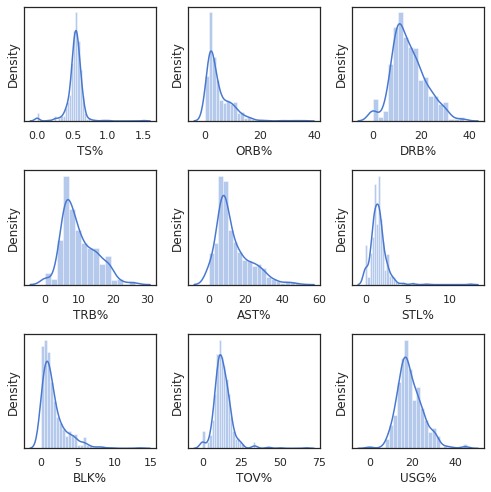

In [87]:
perc = list(filter(lambda x: x.endswith("%"), salaries.keys()))
print(salaries[perc].describe())
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(3, 3, figsize=(7, 7))
for i, col in enumerate(perc):
    sns.distplot(salaries[col], color="b", ax=axes[i//3, i%3])
plt.setp(axes, yticks=[])
plt.tight_layout()

Además, podemos ver que hay 485 filas. Pero hay 483 jugadores distintos. Hay un jugador que aparece en 3 equipos distintos.

In [88]:
salaries[salaries["Player"]=="Kay Felder"]

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
224,Kay Felder,1312611,USA,54,22,DET,1,3,-31.60,0.00,0.50,0.00,35.90,0.00,18.40,0.00,0.00,0.00,33.30,44.20,-0.10,0.00,-0.10,-1.00,-29.50,-11.90,-41.40,0.00
225,Kay Felder,1312611,USA,54,22,CHI,14,134,3.60,0.39,0.27,0.18,0.80,10.80,5.60,23.00,1.10,0.70,17.40,28.00,-0.50,0.10,-0.50,-0.17,-8.20,-3.30,-11.50,-0.30
226,Kay Felder,1312611,USA,54,22,TOT,15,137,2.90,0.38,0.28,0.18,1.50,10.50,5.90,22.50,1.10,0.60,17.90,28.40,-0.60,0.10,-0.50,-0.18,-8.70,-3.50,-12.10,-0.30


## Análisis de variables categórias
Como hemos observado, en los datos se encuentran algunas variables categóricas, como el equipo y el país de procedencia.

Agrupamos por equipo

In [89]:
salariesByTeam = salaries.groupby(['Tm']).mean()

Si analizamos esta agrupacion, en cuanto a la media salarial obtenemos lo siguiente

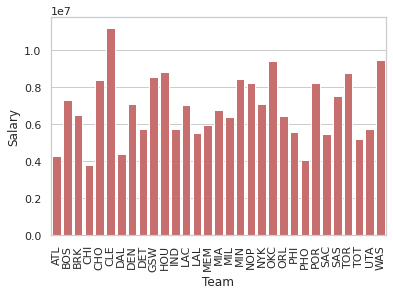

In [90]:
sns.set(style="whitegrid", palette="muted", color_codes=True)
ax = sns.barplot(x=salariesByTeam.index, y=salariesByTeam["Salary"], color="r")
ax.set_xlabel("Team", fontsize=12)
plt.xticks(rotation=90)
plt.show()

Podemos ver que la media salarial es mucho mayor, comparado con otro equipos, en los Cleveland Cavaliers. También en 
Oklahoma City Thunder y Washington Wizards

## Correlación de variables
Para identificar la correlación entre las variables del Dataframe se realiza una matriz de correlación. Sin embargo, es de principal interés la variable de salario. Por lo anterior, se extrae únicamente la correlación entre salario y las demás variables, como se muestra a continuación.

In [91]:
salaries.corr()['Salary'].sort_values(ascending=False)

Salary             1.00
WS                 0.59
VORP               0.57
OWS                0.56
MP                 0.51
DWS                0.51
Age                0.34
BPM                0.31
USG%               0.30
G                  0.30
PER                0.27
AST%               0.27
OBPM               0.27
DRB%               0.20
DBPM               0.18
TS%                0.17
WS/48              0.16
TRB%               0.14
BLK%               0.05
STL%               0.04
FTr                0.02
ORB%               0.00
TOV%              -0.04
3PAr              -0.07
NBA_DraftNumber   -0.38
Name: Salary, dtype: float64

El indicador que utiliza para el cálculo de la correlación es el coeficiente de Pearson, que indica la asociación **lineal** entre dos variables. Para la intuición de la relación entre las variables, usando una matriz de correlación, es necesario tener presente las siguientes consideraciones:

* Los valores pueden estar entre -1 y +1
* Un valor igual a 0 indica que no existe una relación lineal entre las dos variables, aunque no necesariamente son independientes.
* Un valor mayor a 0 indica una correlación lineal positiva, es decir, las variables son directamente proporcionales.
* Un valor menor a 0 indica una correlación lineal negativa, es decir, las variables son inversamente proporcionales.

Además, se dice con frecuencia que dos variables están altamente correlacionadas si su coeficiente es mayor o igual que 0.7. Sin embargo, el valor de referencia también depende del área de estudio y la cantidad de elementos en el análisis.

## Gráfica de correlación
A continuación, una gráfica de la matriz de correlación:

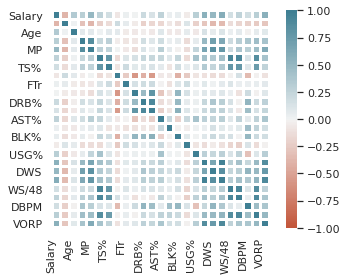

In [92]:
salary_correlation = salaries.corr()
ax = sns.heatmap(
    salary_correlation, 
    linewidth=2,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)
plt.show()

## Análisis de la correlación
De las condiciones del coeficiente de Pearson, inicialmente explicadas, y la gráfica de la matriz se pueden extraer las variables correlacionadas con el salario. Se muestran a continuación las variables escogidas:

In [93]:
salary_correlation = salary_correlation[(salary_correlation['Salary'] > 0.5) | (salary_correlation['Salary'] < -0.30)]
salary_correlation = salary_correlation['Salary']
salary_correlation

Salary             1.00
NBA_DraftNumber   -0.38
MP                 0.51
OWS                0.56
DWS                0.51
WS                 0.59
VORP               0.57
Name: Salary, dtype: float64

Para las variables positivamente correlacionadas fueron escogidas solamente aquellas que excedieran +0.5. En cuanto a las variables negativas, teniendo en cuenta que solo habían tres y sus valores eran más cercanos al 0 que al -1, se escogió la menor.

Grafiquemos cómo se relaciona el salario y el número del draft. Escogeremos los jugadores de menos de 23 años ya que aquí se encuentra la mayor cantidad de Rookies y si incluimos hasta los 25 años, veremos algunos jugadores que han renovado contrato.

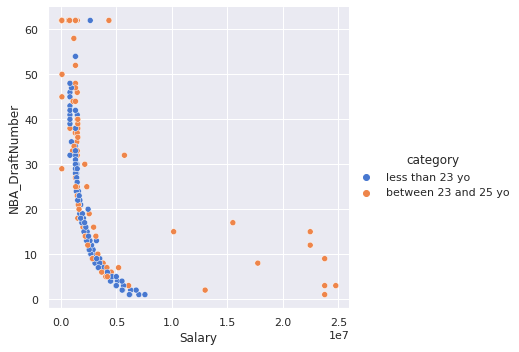

In [94]:
t = salaries[salaries["Age"]<25]
sns.set(style="darkgrid", palette="muted", color_codes=True)
t["category"] = list(map(lambda x: "less than 23 yo" if not x else "between 23 and 25 yo", (23<=t["Age"]) & (t["Age"]<25)))
sns.relplot(x="Salary", y="NBA_DraftNumber", hue="category", data=t)

De lo anterior podemos ver que hay una relación inversamente proporcional. Además, podemos ver que hay unos datos atípicos que son los jugadores que han renovado contrato ganando más dinero.

Veamos cómo se relaciona la variable WS y Age con el salario. Para esto, tomaremos los jugadores de menos de 27 años para que una mejor visualización.

Text(0.5, 1.0, 'WS vs Age vs Salary')

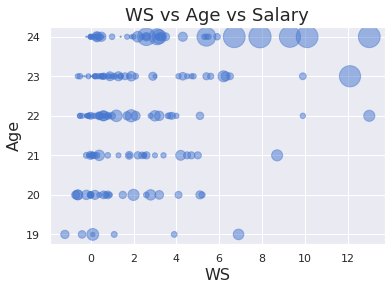

In [95]:
plt.scatter(t['WS'], t['Age'], 
             s=t["Salary"]/50000,
             alpha=0.5)
plt.xlabel("WS", size=16)
plt.ylabel("Age", size=16)
plt.title("WS vs Age vs Salary", size=18)

Podemos ver que a mayor WS y mayor edad, el salario es mayor. Además, se ve que a medida que los jugadores van envejeciendo, no garantiza totalmente que su WS vaya a mejorar.

Acabamos de ver las variables independientes más correlacionadas con la variable dependiente. Ahora veremos las variables independientes más correlacionadas entre ellas:

In [96]:
def get_most_correlated_variables(df):
    indep_corr = df.corr()
    arr = pd.DataFrame(columns=["start", "end", "corr"])
    for i in indep_corr.columns:
        for j in indep_corr.columns:
            df = pd.DataFrame({"start": [i],
                               "end": [j],
                               "corr": [indep_corr.loc[i, j]]})
            arr = arr.append(df)
            
    arr = arr[arr["start"]>arr["end"]]
    arr["abs"]=abs(arr["corr"])
    arr = arr.sort_values(by=["abs"], ascending=False)[["start", "end", "corr"]]
    arr.index = range(arr.index.size)
    arr = arr[abs(arr["corr"])>0.5]
    return arr
arr = get_most_correlated_variables(salaries[salaries.columns.drop("Salary")])
print(arr)

    start   end  corr
0      WS   OWS  0.96
1   WS/48   PER  0.93
2   WS/48  OBPM  0.93
3     PER  OBPM  0.91
4    TRB%  DRB%  0.91
5    OBPM   BPM  0.91
6      WS  VORP  0.91
7      MP     G  0.87
8   WS/48   BPM  0.87
9    VORP   OWS  0.87
10    PER   BPM  0.86
11     WS   DWS  0.84
12     MP   DWS  0.82
13   TRB%  ORB%  0.80
14    TS%  OBPM  0.79
15     WS    MP  0.78
16  WS/48   TS%  0.78
17    TS%   PER  0.78
18   VORP   DWS  0.75
19    TS%   BPM  0.74
20      G   DWS  0.71
21    OWS    MP  0.66
22    OWS   DWS  0.65
23     WS     G  0.63
24   VORP    MP  0.61
25   ORB%  3PAr -0.58
26   TRB%  BLK%  0.57
27   TRB%  3PAr -0.55
28     WS   BPM  0.53
29    DWS  DBPM  0.52
30   DRB%  DBPM  0.52
31   ORB%  BLK%  0.51
32   DBPM  BLK%  0.51
33   VORP   BPM  0.50


Encontraremos cuáles son las variables que más aparecen en esta lista:

In [97]:
var = list(salaries.columns)
f = lambda x: list(arr["start"]).count(x) + list(arr["end"]).count(x)
var = sorted(var, key=f, reverse=True)
list(zip(var, list(map(f, var))))

[('DWS', 6),
 ('WS', 6),
 ('BPM', 6),
 ('MP', 5),
 ('VORP', 5),
 ('PER', 4),
 ('TS%', 4),
 ('TRB%', 4),
 ('OWS', 4),
 ('WS/48', 4),
 ('OBPM', 4),
 ('G', 3),
 ('ORB%', 3),
 ('BLK%', 3),
 ('DBPM', 3),
 ('3PAr', 2),
 ('DRB%', 2),
 ('Player', 0),
 ('Salary', 0),
 ('NBA_Country', 0),
 ('NBA_DraftNumber', 0),
 ('Age', 0),
 ('Tm', 0),
 ('FTr', 0),
 ('AST%', 0),
 ('STL%', 0),
 ('TOV%', 0),
 ('USG%', 0)]

Podemos ver que las variables WS, OWS, DWS y WS/48 son de las que más aparecen. Miremos qué sucede si las quitamos.

In [98]:
get_most_correlated_variables(salaries[salaries.columns.drop(["Salary", "WS", "OWS", "DWS", "WS/48"])])

,start,end,corr
0,PER,OBPM,0.91
1,TRB%,DRB%,0.91
2,OBPM,BPM,0.91
3,MP,G,0.87
4,PER,BPM,0.86
5,TRB%,ORB%,0.80
6,TS%,OBPM,0.79
7,TS%,PER,0.78
8,TS%,BPM,0.74
9,VORP,MP,0.61


Se reduce a la mitad la cantidad de parejas de las cuales el valor absoluto de la correlación sobrepasa el 0.5. Podemos ver también que aparecen las variables BPM, OBPM y DBPM. Es claro que cuando hay una estadística general y luego aparecen las mismas pero de forma ofensiva y defensiva, habrá una mayor correlación.

Veamos cómo se relacionan las variables WS, OWS, DWS y WS/48

<Figure size 1296x1296 with 0 Axes>

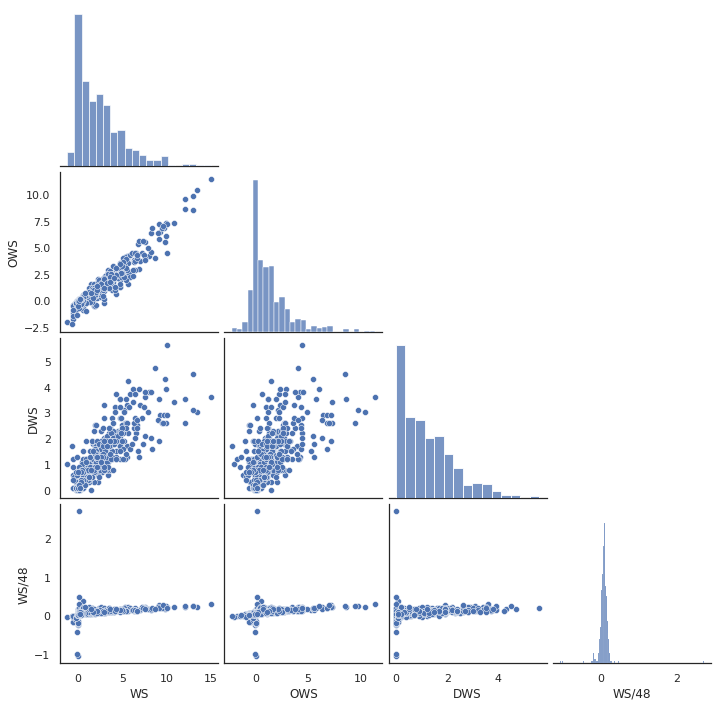

In [99]:
plt.figure(figsize=(18,18))
sns.set(style="white")
ax = sns.pairplot(salaries[["WS", "OWS", "DWS", "WS/48"]], corner=True)

Se pueden ver grandes correlaciones de manera gráfica, entre WS y OWS hay 0.96 de correlación, casi pinta una línea recta. Entre las demás se nota una alta correlación también.

# Modelos Predictivos

## Entendimiento de los datos

Para el dominio del problema a tratar es importante entender la naturaleza de las variables que brinda el dataset con el fin de evaluar su pertinencia a la hora de considerar modelos predictivos.

En el análisis previo observamos que algunas variables contenian datos con valores negativos, exploremos cuáles variables son.

In [100]:
evaluation = (salaries.select_dtypes('number') < 0).any()
evaluation[evaluation.values == True]

PER      True
OWS      True
WS       True
WS/48    True
OBPM     True
DBPM     True
BPM      True
VORP     True
dtype: bool

Entonces, se obtiene que las variables Player Efficiency Rating (PER), Win Share (WS, WS/48), Box Plus/Minus (BPM, OBPM, DBPM) y Value Over Replacement Player (VORP) contienen valores negativos.

### PER
Es un puntaje que mide la eficiencia del jugador por minuto. En su fórmula incluye variables que influyen positivamente en el partido como las variables que afectan el rendimiento del jugador, siendo estas las que disminuyen el PER incluso llevándolo a ser negativo.
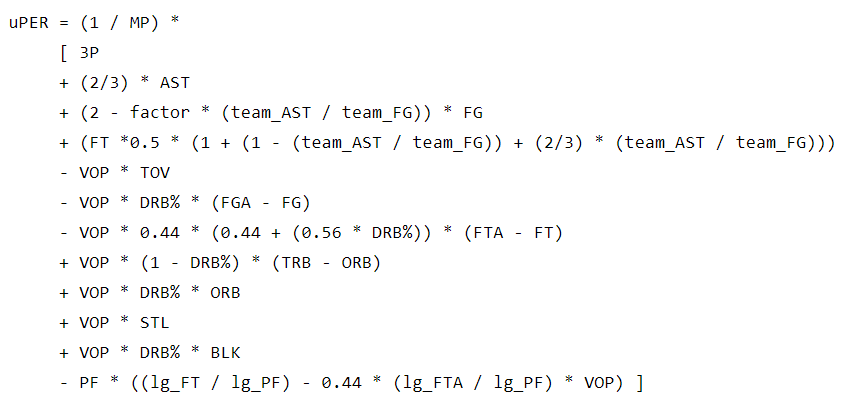

### WS y OWS
Win Shares representa la cantidad de victorias a las que aporta un jugador por sus estadísticas globales. Mientras que Offensive Win Shares, solo toma las estadísticas ofensivas en su cálculo. Un WS u OWS negativo significa que el jugador en vez de aportar para una victoria, aportó para una derrota.

### BPM, OBPM y DBPM
Box Plus/Minus es la calificación del jugador por el rendimiento del partido, la base inicial es 0, de ahí puede crecer (rendimiento positivo) o por el contrario, decrecer (rendimiento negativo). OBPM y DBPM tienen en cuenta ya sea las estadísticas ofensivas o defensivas para calcular el BPM dependiendo del tipo de posesión (ofensiva o defensiva).

### VORP
Value Over Replacement Player es una medida similar al BPM pero en este caso el rendimiento del jugador se compara con el de un "replacement player" (jugador de remplazo). La fórmula es [BPM - (-2.0)] * (% of possessions played) * (team games/82), cuando BPM es menor a -2.0, el VORP es negativo. Se puede inferir que el jugador tiene un rendimiento similar a un jugador de remplazo o peor.





### El caso del True Shooting percentaje (TS)

Previamente, al realizar la exploración de los datos se observó que existe un registro con un valor muy alto de TS con respecto a los demás registros. Veamos de que registro se habla:

In [101]:
to_remove = [224, 225]
to_remove.append(salaries['TS%'].argmax())
salaries.iloc[salaries['TS%'].argmax()]

Player             Naz Mitrou-Long
Salary                       92160
NBA_Country                 Canada
NBA_DraftNumber                 62
Age                             24
Tm                             UTA
G                                1
MP                               1
PER                         134.10
TS%                           1.50
3PAr                          1.00
FTr                           0.00
ORB%                          0.00
DRB%                          0.00
TRB%                          0.00
AST%                          0.00
STL%                          0.00
BLK%                          0.00
TOV%                          0.00
USG%                         45.10
OWS                           0.10
DWS                           0.00
WS                            0.10
WS/48                         2.71
OBPM                         68.70
DBPM                        -14.30
BPM                          54.40
VORP                          0.00
Name: 142, dtype: ob

Esta medida se enfoca en obtener una noción de la eficiencia que tiene un jugador a la hora de realizar un tiro. Entonces, teniendo en cuenta que esta estadistica se calcula de la siguiente manera: 

TS = 0.5 * (Total de puntos) / [(Total de intentos de tiro de campo) + 0.44 * (Total de intentos de tiros libres)]

Encontramos que el caso de del registro de Naz Mitrou-Long, según datos de la nba el jugador en aquella temporada anotó un total de 3 puntos en tan solo 1 intento de tiro de campo. Es así como podemos observar que esta medida no tiene mucho sentido en este caso y solo nos da una nocion de "Puntos por disparo" al no considerar otras variables que puedan aportar mas información al resultado. 

Sin duda, esta medida podría ser considerada no en el contexto de todos los jugadores porque se sesgaría la prediccion, sino el el dominio de un conjunto especifico.

### FTr mayor a 1
Podemos ver que el Free Throw Rate está, en la mayoría de los casos, entre 0 y 1

In [102]:
salaries[["FTr"]].describe()

,FTr
count,483.00
mean,0.26
std,0.29
min,0.00
25%,0.15
50%,0.23
75%,0.32
max,5.33


Sin embargo, hay unos cuantos datos que están por encima de 1.

In [103]:
to_remove += list(salaries[salaries["FTr"] > 1][["Player", "FTr", "MP"]].index)
to_remove

[224, 225, 142, 18, 84, 165, 396]

Podemos ver que son jugadores que han jugado muy pocos minutos. La fórmula de FTr es FTA/FGA. Free Throws Attempted dividido Field Goals Attempted, este último es cualquier tiro que no sea un tiro libre, en general, uno esperaría que sea mayor el número de field goals a el de free throws. Sin embargo, un jugador que haya jugado muy pocos minutos tendrá la posibilidad hacer esto al revés, es por esto que hay valores por encima de 1.

Hay una diferencia entre la escala de TS y los demás porcentajes, puesto que estos últimos se encuentran entre 0 y 100. Sin embargo, ya que se normalizarán las entradas, esto no presenta mayor problema.

## Limpieza y pretratamiento de los datos



Se eliminan las filas que tengan valores faltantes y se separan las variables independientes de la variable dependiente. Además, se hará one hot encoding para representar la variable Tm de manera numérica. Cabe resaltar que la variable dependiente se dividirá entre 1.000.000 para que los datos de entrenamiento sean más fáciles de leer.

In [104]:
salaries = salaries.drop(index=to_remove)
salaries = salaries.dropna().reset_index()
salaries = salaries.drop(columns=["index"])
print("Datos restantes:",len(salaries.index))
numerical_values = salaries[salaries.columns.drop(["Player", "NBA_Country"])]
tms = pd.get_dummies(numerical_values.Tm, prefix="Tm")
del numerical_values["Tm"]
numerical_values = numerical_values.join(tms)
Xvals = numerical_values.iloc[:, 1:]
y = numerical_values.iloc[:,[0]]/1000000
X = pd.DataFrame(Xvals, columns=Xvals.columns)

Datos restantes: 476


Una vez con el protocolo de evaluación listo, probaremos distintos modelos y encontraremos el mejor.

Encontremos el baseline:

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
y_p = np.ones(y.shape[0])*y.mean()[0]
mean_squared_error(y, y_p)

54.88621971103695

Para que un modelo sea mejor que nuestro baseline, tendrá que tener un mse menor a 54.6

## Importancia de las variables independientes.

Usaremos la regresión lineal para mostrar qué tan importantes son las variables que tenemos en el modelo.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("Datos de entrenamiento:", X_train.shape[0])
print("Datos de prueba:", X_test.shape[0])
X_test

Datos de entrenamiento: 380
Datos de prueba: 96


,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Tm_ATL,Tm_BOS,Tm_BRK,Tm_CHI,Tm_CHO,Tm_CLE,Tm_DAL,Tm_DEN,Tm_DET,Tm_GSW,Tm_HOU,Tm_IND,Tm_LAC,Tm_LAL,Tm_MEM,Tm_MIA,Tm_MIL,Tm_MIN,Tm_NOP,Tm_NYK,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
441,62,29,35,286,25.10,0.61,0.00,0.62,13.90,29.80,21.70,12.50,1.50,3.30,16.00,28.80,0.80,0.50,1.20,0.21,-0.50,0.60,0.10,0.20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
363,31,21,58,841,16.70,0.62,0.00,0.23,9.00,21.70,15.20,7.30,0.80,3.90,10.10,15.40,1.70,0.80,2.50,0.14,-1.30,0.50,-0.80,0.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,62,23,39,518,13.00,0.57,0.59,0.14,9.70,17.70,13.70,7.90,0.80,0.70,8.00,14.80,0.90,0.30,1.20,0.11,0.50,-1.50,-1.00,0.10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
132,25,29,61,1918,14.30,0.52,0.42,0.20,3.00,13.80,8.30,26.00,1.60,1.00,15.00,18.20,1.60,1.70,3.30,0.08,0.80,0.40,1.20,1.60,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
90,62,23,12,203,4.10,0.43,0.58,0.13,0.00,8.20,4.10,7.10,0.70,1.20,9.60,18.00,-0.30,0.10,-0.30,-0.06,-5.00,-2.70,-7.70,-0.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,12,23,79,2359,12.30,0.54,0.46,0.18,2.20,15.40,8.80,13.40,1.70,1.50,15.50,21.70,-0.30,1.90,1.60,0.03,-1.10,0.00,-1.10,0.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
359,11,21,70,1711,17.30,0.57,0.05,0.35,10.50,25.30,18.00,12.60,1.00,1.50,15.70,21.70,2.40,2.10,4.50,0.12,-0.80,0.40,-0.40,0.70,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
78,24,28,73,2010,14.50,0.57,0.38,0.15,4.30,21.20,12.90,4.40,0.70,3.70,9.60,19.40,1.90,2.80,4.80,0.11,-0.90,0.50,-0.40,0.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
324,18,32,37,825,14.00,0.56,0.72,0.15,1.90,14.00,8.00,4.40,1.40,1.30,5.20,21.70,1.00,0.90,1.90,0.11,0.60,-2.30,-1.80,0.10,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Ahora normalizamos los datos.

In [107]:
scaler = StandardScaler()
scaler.fit(X_train)
X = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train

,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Tm_ATL,Tm_BOS,Tm_BRK,Tm_CHI,Tm_CHO,Tm_CLE,Tm_DAL,Tm_DEN,Tm_DET,Tm_GSW,Tm_HOU,Tm_IND,Tm_LAC,Tm_LAL,Tm_MEM,Tm_MIA,Tm_MIL,Tm_MIN,Tm_NOP,Tm_NYK,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
256,-0.91,2.28,0.01,-0.02,-0.78,-0.42,0.31,-0.89,-0.79,-0.02,-0.37,-0.31,-0.86,-0.71,-0.25,-0.46,-0.81,0.06,-0.58,-0.45,-0.62,0.03,-0.47,-0.92,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,2.60,-0.20,-0.15
434,-1.29,-1.51,0.34,1.05,0.15,0.02,-0.88,0.92,-0.40,-0.16,-0.28,0.53,-0.49,0.06,0.20,0.66,-0.13,0.67,0.17,-0.11,-0.09,0.36,0.12,-0.21,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,5.54,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
350,0.78,-0.09,1.04,0.56,0.95,1.31,-0.73,1.35,0.93,0.96,1.05,-0.55,0.61,-0.00,-0.41,-0.57,1.79,0.87,1.59,1.44,0.76,0.97,1.10,1.20,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,6.42,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
245,-1.15,-0.33,0.96,0.65,1.56,0.93,-1.02,0.47,1.69,2.37,2.44,-0.60,-0.74,0.83,-0.04,0.75,1.79,1.68,1.90,1.61,0.64,0.54,0.80,0.85,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,6.08,-0.38,-0.20,-0.15
439,-0.33,-1.04,0.75,0.51,1.17,0.14,-0.25,-0.34,1.25,1.14,1.32,0.08,-0.00,-0.35,-0.52,1.35,0.55,0.27,0.48,0.42,0.86,-0.12,0.61,0.49,-0.16,-0.16,-0.16,5.79,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.69,-0.33,-0.03,-0.80,-0.48,-0.13,0.07,-0.56,-0.56,-0.62,-0.66,-0.35,-0.25,-0.89,-0.19,-0.12,-0.64,-0.74,-0.74,-0.41,-0.37,-0.82,-0.72,-0.83,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,5.54,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
72,0.25,0.15,0.59,0.17,0.11,-0.09,-0.02,-0.01,-0.67,-0.45,-0.64,1.86,0.48,-0.71,0.52,-0.19,-0.07,-0.14,-0.15,-0.01,0.10,-0.35,-0.10,-0.57,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,5.79,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
396,-1.10,0.62,-1.22,-0.61,0.15,0.11,0.44,0.69,-0.77,-0.01,-0.33,-0.45,-0.74,-0.30,-0.81,0.37,-0.24,-0.74,-0.42,0.18,0.42,-0.40,0.12,-0.39,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,6.08,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
235,0.01,-0.09,0.67,-0.22,-1.30,-1.25,1.31,-0.99,-0.06,-0.13,-0.16,-1.16,-0.86,1.36,-0.17,-1.66,-0.97,-0.14,-0.74,-0.67,-1.06,0.54,-0.52,-0.92,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,5.54,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15


In [108]:
from sklearn import linear_model
from scipy import stats
import statsmodels.api as sm

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
for var, coef in zip(numerical_values.columns.drop("Salary"), np.squeeze(regr.coef_)):
    print("{}: {}".format(var, coef))
print("intercepción: {}".format(np.squeeze(regr.intercept_)))

NBA_DraftNumber: -1.0742142106693393
Age: 1.9765778758898673
G: -4.142086902141897
MP: 5.700382461303741
PER: -3.2971232057645365
TS%: -0.1236199150947348
3PAr: 0.1117814710212035
FTr: 0.37506662392669043
ORB%: -9.874640358097935
DRB%: -14.962942390450522
TRB%: 21.89905244540596
AST%: -0.371011936110786
STL%: -0.3430493305845199
BLK%: -0.7231404337564109
TOV%: 0.07733925470434144
USG%: 2.3044237985619476
OWS: 3.33775652352404
DWS: 1.5329828867823072
WS: -5.511819560538166
WS/48: 4.583483547733163
OBPM: 6.378830424834155
DBPM: 6.000150731112081
BPM: -10.280109448002959
VORP: 2.2086373436815134
Tm_ATL: 9837649626304.51
Tm_BOS: 10355808321248.41
Tm_BRK: 10355808321248.652
Tm_CHI: 10846576083735.389
Tm_CHO: 11759472737322.055
Tm_CLE: 8699345455194.716
Tm_DAL: 9837649626304.309
Tm_DEN: 10846576083735.746
Tm_DET: 10846576083735.646
Tm_GSW: 12597234185668.598
Tm_HOU: 9287516637438.977
Tm_IND: 11313518039557.062
Tm_LAC: 10355808321248.676
Tm_LAL: 11313518039556.895
Tm_MEM: 12186744381727.023
T

Aquí podemos observar los pesos que tienen las variables

In [110]:
train_y_pred = regr.predict(X_train)
test_y_pred = regr.predict(X_test)
print("MSE (train): %.4f" % mean_squared_error(y_train, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(y_test, test_y_pred))
print('R2  (train): %.4f' % r2_score(y_train, train_y_pred))
print('R2  (test) : %.4f' % r2_score(y_test, test_y_pred))

MSE (train): 22.1615
MSE (test) : 32.6270
R2  (train): 0.5527
R2  (test) : 0.5682


Podemos observar los errores del set de entrenamiento y el set de prueba. Calcularemos ahora el r2 ajustado.

In [111]:
r2_aj_train = 1 - (1-r2_score(y_train, train_y_pred))*(len(y_train)-1) / (len(y_train) - X_train.shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test, test_y_pred))*(len(y_test)-1) / (len(y_test) - X_test.shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.4768
R2 adj (test): -0.0255


In [112]:
X_test

,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Tm_ATL,Tm_BOS,Tm_BRK,Tm_CHI,Tm_CHO,Tm_CLE,Tm_DAL,Tm_DEN,Tm_DET,Tm_GSW,Tm_HOU,Tm_IND,Tm_LAC,Tm_LAL,Tm_MEM,Tm_MIA,Tm_MIL,Tm_MIN,Tm_NOP,Tm_NYK,Tm_OKC,Tm_ORL,Tm_PHI,Tm_PHO,Tm_POR,Tm_SAC,Tm_SAS,Tm_TOR,Tm_TOT,Tm_UTA,Tm_WAS
441,1.61,0.62,-0.64,-1.09,2.03,0.79,-1.50,2.76,2.08,2.30,2.50,-0.05,-0.00,0.94,0.45,1.86,-0.24,-0.64,-0.46,1.63,0.26,0.50,0.46,-0.30,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,2.60,-0.20,-0.15
363,0.11,-1.28,0.30,-0.39,0.62,0.92,-1.50,-0.11,0.95,1.05,1.13,-0.64,-0.86,1.30,-0.49,-0.57,0.27,-0.34,0.05,0.81,0.01,0.45,0.24,-0.21,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,5.11,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
31,1.61,-0.80,-0.48,-0.80,-0.01,0.34,1.12,-0.79,1.12,0.44,0.81,-0.57,-0.86,-0.59,-0.83,-0.68,-0.19,-0.84,-0.46,0.40,0.57,-0.49,0.19,-0.39,6.42,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
132,-0.18,0.62,0.43,0.98,0.21,-0.17,0.39,-0.31,-0.42,-0.16,-0.33,1.49,0.12,-0.41,0.29,-0.06,0.21,0.57,0.37,0.07,0.67,0.40,0.73,0.93,-0.16,-0.16,-0.16,-0.17,5.31,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
90,1.61,-0.80,-1.59,-1.20,-1.51,-1.11,1.08,-0.87,-1.11,-1.02,-1.21,-0.66,-0.98,-0.30,-0.57,-0.10,-0.86,-1.05,-1.05,-1.69,-1.16,-1.06,-1.45,-0.74,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,5.79,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,-0.81,-0.80,1.16,1.54,-0.12,0.10,0.57,-0.45,-0.61,0.08,-0.22,0.06,0.24,-0.12,0.37,0.57,-0.86,0.77,-0.30,-0.55,0.07,0.21,0.17,-0.04,6.42,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
359,-0.86,-1.28,0.79,0.71,0.72,0.37,-1.26,0.74,1.30,1.61,1.72,-0.03,-0.62,-0.12,0.40,0.57,0.66,0.97,0.84,0.60,0.16,0.40,0.34,0.14,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,5.54,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15
78,-0.23,0.38,0.92,1.09,0.25,0.36,0.20,-0.67,-0.12,0.98,0.65,-0.97,-0.98,1.18,-0.57,0.16,0.38,1.68,0.96,0.46,0.13,0.45,0.34,0.23,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,-0.15,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,6.08,-0.38,-0.20,-0.15
324,-0.52,1.33,-0.56,-0.41,0.16,0.24,1.72,-0.73,-0.67,-0.13,-0.39,-0.97,-0.13,-0.24,-1.27,0.57,-0.13,-0.24,-0.19,0.44,0.60,-0.87,-0.01,-0.39,-0.16,-0.16,-0.16,-0.17,-0.19,-0.14,-0.16,-0.17,-0.17,-0.20,6.82,-0.18,-0.16,-0.18,-0.20,-0.17,-0.18,-0.16,-0.19,-0.18,-0.18,-0.17,-0.17,-0.20,-0.16,-0.15,-0.19,-0.16,-0.38,-0.20,-0.15


Se puede ver la diferencia entre el r2 de prueba y de entrenamiento, símbolo de overfitting. Esto muestra cómo el valor de r2 puede sobrevalorar la eficiencia del modelo. Para solucionar este problema, buscaremos cuáles son las variables que más aportan a la predicción.

In [113]:
train_x2 = sm.add_constant(X_train)
modeloStats = sm.OLS(y_train, train_x2)
results = modeloStats.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     7.443
Date:                Thu, 26 Nov 2020   Prob (F-statistic):           2.11e-32
Time:                        04:34:56   Log-Likelihood:                -1127.8
No. Observations:                 380   AIC:                             2366.
Df Residuals:                     325   BIC:                             2582.
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.5949      0.261     25.261      0.000       6.081       7.109
NBA_DraftNumber    -1.0742      0.325     -3.308      0.001      -1.713      -0.435
Age                 1.9953      0.289      6.899      0.000       1.426       2.564
G                  -4.1766      0.743     -5.624      0.000      -5.638      -2.716
MP                  5.8340      1.049      5.559      0.000       3.770       7.899
PER                -3.2744      2.370     -1.382      0.168      -7.936       1.388
TS%                -0.1073      0.837     -0.128      0.898      -1.754       1.540
3PAr                0.0514      0.783      0.066      0.948      -1.490       1.593
FTr                 0.4035      0.364      1.109      0.268      -0.313       1.120
ORB%              -10.2707      7.486     -1.372      0.171     -24.997       4.456
DRB%              -15.4522     11.138     -1.387      0.166     -37.364       6.460
TRB%               22.7208     16.330      1.391      0.165      -9.405      54.846
AST%               -0.3721      0.577     -0.645      0.519      -1.507       0.763
STL%               -0.2985      0.568     -0.525      0.600      -1.417       0.819
BLK%               -0.6112      0.782     -0.781      0.435      -2.150       0.928
TOV%                0.0338      0.535      0.063      0.950      -1.019       1.087
USG%                2.1985      1.041      2.111      0.036       0.150       4.247
OWS                 4.7075      9.565      0.492      0.623     -14.109      23.524
DWS                 2.2004      5.308      0.415      0.679      -8.241      12.642
WS                 -7.5113     13.664     -0.550      0.583     -34.393      19.370
WS/48               4.3328      2.223      1.949      0.052      -0.041       8.706
OBPM                6.2868     17.795      0.353      0.724     -28.721      41.295
DBPM                5.6999     11.555      0.493      0.622     -17.032      28.432
BPM                -9.9151     22.303     -0.445      0.657     -53.792      33.962
VORP                2.2612      0.959      2.357      0.019       0.374       4.149
Tm_ATL              0.1207      0.273      0.441      0.659      -0.417       0.659
Tm_BOS             -0.1580      0.325     -0.487      0.627      -0.797       0.481
Tm_BRK              0.0484      0.266      0.182      0.856      -0.476       0.572
Tm_CHI             -0.0437      0.287     -0.152      0.879      -0.608       0.521
Tm_CHO              0.2539      0.271      0.937      0.350      -0.279       0.787
Tm_CLE              0.3339      0.277      1.205      0.229      -0.211       0.879
Tm_DAL             -0.0702      0.280     -0.251      0.802      -0.621       0.480
Tm_DEN              0.3057      0.274      1.115      0.265      -0.233       0.845
Tm_DET              0.2667      0.292      0.913      0.362

Observamos que hay muchas variables que no son significativas en el modelo. Las únicas que sí son NBA_DraftNumber, Age, G y MP. Además, se ve que hay un problema de multicolinearidad entre las variables. Teniendo esto en cuenta, junto con el análisis de correlación que se hizo anteriormente, pasaremos a la escogencia de variables usando forward stepwise.


## Forward Stepwise

Relizamos el algoritmo para encontrar las variables.

In [114]:
remaining = set(X_train.columns)
selected = []
current_score, best_new_score = 0.0, 0.0
while remaining and current_score == best_new_score:
  scores_with_candidates = []
  for candidate in remaining:
    train_x2 = X_train[selected + [candidate]]
    train_x2 = sm.add_constant(train_x2)
    score = sm.OLS(y_train, train_x2).fit().rsquared_adj
    scores_with_candidates.append(score)
  sort = sorted(zip(scores_with_candidates, remaining))
  best_new_score, best_candidate = sort.pop()
  if current_score < best_new_score:
    remaining.remove(best_candidate)
    selected.append(best_candidate)
    current_score = best_new_score

train_x2 = X_train[selected]
train_x2 = sm.add_constant(train_x2)
modeloStats = sm.OLS(y_train, train_x2)
results = modeloStats.fit();
print(str(selected)+ ": mejores variables para el modelo. r2_adj:", results.rsquared_adj)

['VORP', 'Age', 'NBA_DraftNumber', 'USG%', 'MP', 'G', 'FTr', 'Tm_HOU', 'AST%', 'Tm_PHI', 'Tm_TOR', 'Tm_POR', 'Tm_CLE', 'DRB%', 'BLK%', 'Tm_CHI', 'Tm_PHO']: mejores variables para el modelo. r2_adj: 0.5115420891530983


Encontramos cuáles son las variables que mejor rendimiento nos pueden dar para los modelos predictivos. Además, podemos ver que hay ciertos equipos a los cuáles el pertenecer a ellos, ayuda mucho a saber cuál será su salario.

In [115]:
regr = linear_model.LinearRegression()
regr.fit(X_train[selected], y_train)
train_y_pred = regr.predict(X_train[selected])
test_y_pred = regr.predict(X_test[selected])
print("MSE (train): %.4f" % mean_squared_error(y_train, train_y_pred))
print("MSE (test) : %.4f" % mean_squared_error(y_test, test_y_pred))
print('R2  (train): %.4f' % r2_score(y_train, train_y_pred))
print('R2  (test) : %.4f' % r2_score(y_test, test_y_pred))

MSE (train): 23.1161
MSE (test) : 31.4771
R2  (train): 0.5335
R2  (test) : 0.5834


In [116]:
r2_aj_train = 1 - (1-r2_score(y_train, train_y_pred))*(len(y_train)-1) / (len(y_train) - X_train[selected].shape[1] - 1)
print('R2 adj (train): %.4f' %r2_aj_train)
r2_aj_test = 1 - (1-r2_score(y_test, test_y_pred))*(len(y_test)-1) / (len(y_test) - X_test[selected].shape[1] - 1)
print('R2 adj (test): %.4f' %r2_aj_test)

R2 adj (train): 0.5115
R2 adj (test): 0.4926


Ahora el valor de R2 adj de test es mucho más cercano al valor de prueba, lo que muestra que ahora se está generalizando mucho mejor.

## Protocolos de evaluación

Ahora aplicaremos K-fold Cross Validation para evaluar de la mejor forma los modelos que se implementarán más tarde.

In [117]:
from sklearn.model_selection import KFold
num_folds = 8
Kfold = KFold(n_splits=num_folds, shuffle=True)

## Evaluación de modelos

### Evaluación de Regresión Lineal

Vamos a evaluar el modelo con KFold Cross Validation

In [118]:
loss_per_fold=[]
fold_no=1
for train, test in Kfold.split(X,y):
  regr = linear_model.LinearRegression()
  regr.fit(X.loc[train, selected], y.loc[train, :])
  test_y_pred = regr.predict(X.loc[test, selected])
  error = mean_squared_error(y.loc[test, :], test_y_pred)
  print("MSE (test) : %.4f" % error, "for fold no. {}".format(fold_no))
  loss_per_fold.append(error)
  fold_no+=1
np.mean(loss_per_fold)

MSE (test) : 24.5912 for fold no. 1
MSE (test) : 28.9722 for fold no. 2
MSE (test) : 24.1985 for fold no. 3
MSE (test) : 13.0811 for fold no. 4
MSE (test) : 31.2863 for fold no. 5
MSE (test) : 26.0739 for fold no. 6
MSE (test) : 43.0030 for fold no. 7
MSE (test) : 26.1188 for fold no. 8


27.16562369161767

### Evaluación de Regresión con KNN
Evaluaremos este modelo con KFold cross validation

In [119]:
from sklearn.neighbors import KNeighborsRegressor
k = 8
loss_per_fold=[]
fold_no=1
for train, test in Kfold.split(X,y):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X.loc[train, selected], y.loc[train, :])
  y_pred = knn.predict(X.loc[test, selected])
  error = mean_squared_error(y.loc[test,:], y_pred)
  print("MSE (test) : %.4f" % error, "for fold no. {}".format(fold_no))
  loss_per_fold.append(error)
  fold_no+=1
np.mean(loss_per_fold)

MSE (test) : 18.3389 for fold no. 1
MSE (test) : 39.7490 for fold no. 2
MSE (test) : 33.2136 for fold no. 3
MSE (test) : 45.9704 for fold no. 4
MSE (test) : 35.1501 for fold no. 5
MSE (test) : 39.7660 for fold no. 6
MSE (test) : 31.0140 for fold no. 7
MSE (test) : 41.1154 for fold no. 8


35.53968659062821

### Evaluación de Redes Neuronales
Evaluaremos el modelo con KFold cross validation

In [120]:
def build_model(architecture, learning_rate, reg_rate, activation):
  lays = []
  initializer = tf.keras.initializers.GlorotNormal()
  regularizer = keras.regularizers.l2(reg_rate)
  lays.append(layers.Dense(architecture[0], activation=activation, input_shape=[len(selected)], kernel_initializer=initializer, kernel_regularizer=regularizer))
  for lay in architecture[1:]:
    lays.append(layers.Dense(lay, activation=activation, kernel_initializer=initializer, kernel_regularizer=regularizer))
  model = keras.Sequential(lays)

  optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'],)
  return model

In [121]:
lays = [16, 8, 4, 1]
loss_per_fold=[]
fold_no=1
EPOCHS = 20
for train, test in Kfold.split(X,y):
  model = build_model(architecture=lays, learning_rate=0.005, reg_rate=0.05, activation="relu")
  history = model.fit(
    X.loc[train, selected], y.loc[train, :], batch_size=8,
    epochs=EPOCHS, validation_split = 0.2, verbose=0)
  loss, mae, mse = model.evaluate(X.loc[test, selected], y.loc[test, :], verbose=0)
  loss_per_fold.append(mse)
  print("Testing set Loss Error: {:5.2f} Salaries".format(mse), "for fold no. {}".format(fold_no))
  fold_no+=1
np.mean(loss_per_fold)

Testing set Loss Error: 35.14 Salaries for fold no. 1
Testing set Loss Error: 28.64 Salaries for fold no. 2
Testing set Loss Error: 24.14 Salaries for fold no. 3
Testing set Loss Error: 17.20 Salaries for fold no. 4
Testing set Loss Error: 20.67 Salaries for fold no. 5
Testing set Loss Error: 22.75 Salaries for fold no. 6
Testing set Loss Error: 43.99 Salaries for fold no. 7
Testing set Loss Error: 26.67 Salaries for fold no. 8


27.399543523788452

Claramente la red neuronal es mejor que la regresión lineal y KNN.

## Entrenamiento de modelos
Ahora sabiendo cuáles son los mejores modelos, procederemos a entrenarlos correctamente.


### Regresión Lineal

In [122]:
model = linear_model.LinearRegression()
model.fit(X_train[selected], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

error: 31.47705482104682


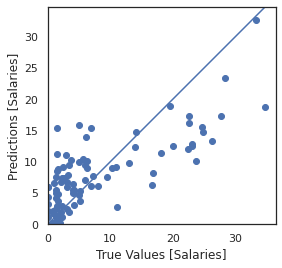

In [123]:
test_y_pred = model.predict(X_test[selected])
error = mean_squared_error(y_test, test_y_pred)
print("error:", error)
plt.scatter(y_test, test_y_pred)
plt.xlabel('True Values [Salaries]')
plt.ylabel('Predictions [Salaries]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 40], [0, 40])

### Regresión con KNN 

Se buscará el mejor k para hacer una regresión con KNN.

El mejor k: 17
error: 39.9355165531151


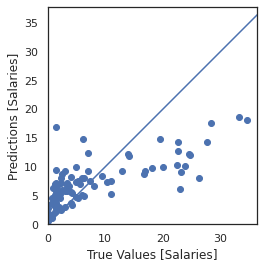

In [124]:
errors = [200000]
best_k = 1
for k in range(1, 21):
  knn = KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train[selected], y_train)
  y_pred = knn.predict(X_test[selected])
  error = mean_squared_error(y_test, y_pred)
  if error < min(errors):
    best_k = k
  errors.append(error)
print("El mejor k:", best_k)
print("error:", min(errors))
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train[selected], y_train)
y_pred = knn.predict(X_test[selected])
plt.scatter(y_test, y_pred)
plt.xlabel('True Values [Salaries]')
plt.ylabel('Predictions [Salaries]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 40], [0, 40])

### Redes Neuronales

Probaremos todas las combinaciones de arquitecturas, épocas y learning rate para encontrar el mejor modelo de reder neuronales. Cabe resaltar que la función de activación no se variará ya que la función RELU funciona mucho mejor que las demás con este dataset.

In [125]:
max_iter_vec = [10, 20, 50, 75, 100]
hidden_layer_sizes_vec = [(10, 1), (20, 1), (30, 1), (10, 10, 1), (20, 10, 1), 
                          (10, 10, 10, 1), (30, 30, 30, 1), (30, 20, 10, 1)]
learning_rate_init_vec = [0.001, 0.005, 0.01, 0.02]
def NN_model_trained(activation, epochs, archi, learning_rate):
  model = build_model(architecture=archi, learning_rate=learning_rate, reg_rate=0.05, activation=activation)
  history = model.fit(
    X_train[selected], y_train, batch_size=8,
    epochs=epochs, validation_split = 0.2, verbose=0)
  y_pred = model.predict(X_test[selected]).flatten()
  error = mean_squared_error(y_test, y_pred)
  return model, error

Con este código:


```record = []
for i, archi in enumerate(hidden_layer_sizes_vec):
  for j, epochs in enumerate(max_iter_vec):
    for k, learning_rate in enumerate(learning_rate_init_vec):
      model, error = NN_model_trained("relu", epochs, archi, learning_rate)
      record.append([i, j, k, model, error])
      print("{}, {}, {}, {}".format(epochs, archi, learning_rate, error))
sorts = sorted(record, key=lambda s: s[4])
print("{}, {}, {}".format(hidden_layer_sizes_vec[sorts[0][0]], max_iter_vec[sorts[0][1]], learning_rate_init_vec[sorts[0][2]]))
print(sorts[0][4])
model = sorts[0][3]
```
Encontramos el mejor modelo de redes neuronales.


Después de muchas iteraciones, encontramos que el mejor modelo por lejos fue aquel con una arquitectura de (10, 10, 10, 1), 20 épocas y un learning_rate de 0.01. El cual tiene un mse para el set de prueba de 15.1. Para evitar tener que encontrarlo de nuevo, guardamos el modelo junto con sus pesos. A continuación se carga dicho modelo.

In [126]:
from keras.models import model_from_json
json_file = open('modelfinal.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("modelfinal.h5")
print("Loaded model from disk")

Loaded model from disk


Visualizamos la precisión del modelo.

error: 17.74526959159721


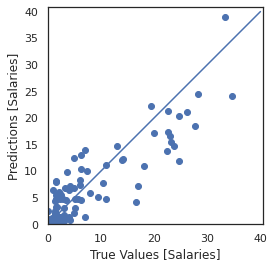

In [127]:
selected = ['WS', 'Age', 'NBA_DraftNumber', 'USG%', 'VORP', 'MP', 'G', 'DRB%', 'Tm_TOR', 'Tm_HOU', 'Tm_CHO', 'Tm_WAS', 'Tm_NYK', 'Tm_BRK', 'DBPM', 'Tm_OKC']
test_predictions = model.predict(X_test[selected]).flatten()
print("error:", mean_squared_error(y_test, test_predictions))
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Salaries]')
plt.ylabel('Predictions [Salaries]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([0, 40], [0, 40])

In [128]:
result = pd.DataFrame(y_test*1000000)
result["prediction"] = test_predictions*1000000
result["dif"] = np.abs(result["Salary"] - result["prediction"])
result.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,96.00,7355094.75,8738092.86,46080.00,1471382.00,3322660.00,9687230.25,34682550.00
prediction,96.00,6807775.56,7108870.62,601897.18,1266686.35,4697611.57,10184173.35,38965713.50
dif,96.00,3071811.06,2897708.09,9035.01,825513.68,2275372.71,4230980.04,12810844.80


Observamos que el dato al que más se acercó el modelo difirió en solo 9035 dólares. En conclusión, las redes neuronales fueron el mejor modelo para predecir el salario.


# PCA

Antes que nada, se quitarán los 2 datos más extraordinarios de cada variable. En total, se limpiarán 32 datos.

In [129]:
indicesAQuitar = np.array([], dtype=int)
for var in X.columns[:24]:
  temp = X.sort_values([var], ascending=False)
  print("Excepciones de:", var, np.sort(temp[0:2].index.to_numpy()))
  indicesAQuitar = np.union1d(indicesAQuitar, temp[0:2].index.to_numpy())
indicesAQuitar

Excepciones de: NBA_DraftNumber [238 340]
Excepciones de: Age [ 19 173]
Excepciones de: G [  5 113]
Excepciones de: MP [187 207]
Excepciones de: PER [ 18 159]
Excepciones de: TS% [266 375]
Excepciones de: 3PAr [131 285]
Excepciones de: FTr [121 254]
Excepciones de: ORB% [ 18 231]
Excepciones de: DRB% [314 382]
Excepciones de: TRB% [382 460]
Excepciones de: AST% [ 84 301]
Excepciones de: STL% [  6 223]
Excepciones de: BLK% [ 18 310]
Excepciones de: TOV% [182 266]
Excepciones de: USG% [ 18 142]
Excepciones de: OWS [187 287]
Excepciones de: DWS [444 460]
Excepciones de: WS [187 287]
Excepciones de: WS/48 [159 375]
Excepciones de: OBPM [ 66 159]
Excepciones de: DBPM [183 347]
Excepciones de: BPM [159 287]
Excepciones de: VORP [187 287]


array([  5,   6,  18,  19,  66,  84, 113, 121, 131, 142, 159, 173, 182,
       183, 187, 207, 223, 231, 238, 254, 266, 285, 287, 301, 310, 314,
       340, 347, 375, 382, 444, 460])

In [130]:
X = X.loc[~X.index.isin(indicesAQuitar)]
X.shape

(444, 55)

Para el análisis de componentes principales solo se tendrán en cuenta las variables numéricas.

In [131]:
from sklearn.decomposition import PCA
pcaD = X[X.columns[:24]]
pca = PCA()
pca.fit(pcaD)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Calculamos cuántos componentes necesitamos para obtener el 95% de la varianza explicada. Podemos ver que son los primeros 12 componentes.


In [132]:
var_exp=pca.explained_variance_ratio_ # varianza explicada por cada PC
cum_var_exp = np.cumsum(var_exp) # varianza acumulada por los primeros n PCs
cum_var_exp

array([0.36836088, 0.53319125, 0.6062772 , 0.6772028 , 0.73472988,
       0.78019466, 0.82006701, 0.85763441, 0.88603568, 0.91214724,
       0.93349872, 0.95405256, 0.96890641, 0.97827752, 0.98639667,
       0.99145315, 0.99473603, 0.9974979 , 0.9988341 , 0.99959195,
       0.99996615, 0.99998407, 0.99999627, 1.        ])

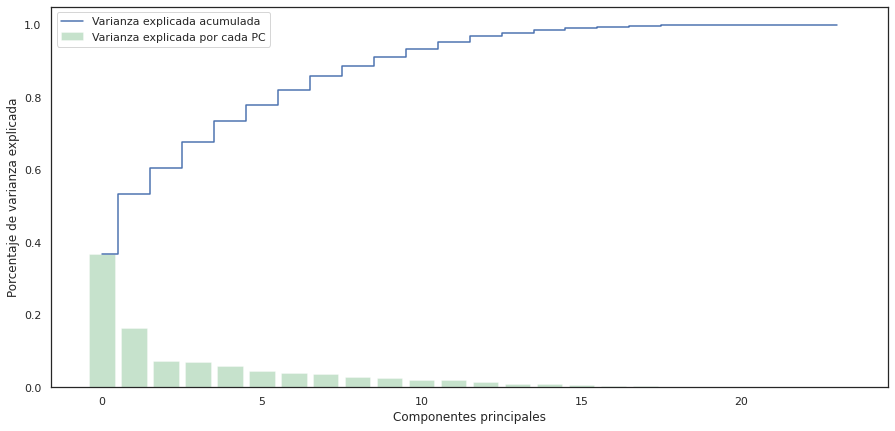

In [133]:
plt.figure(figsize=(15, 7))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='Varianza explicada por cada PC', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='Varianza explicada acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.legend(loc='best')
plt.show()

In [134]:
np.sum(pca.explained_variance_ratio_[0:12])

0.9540525642

Se transforman los datos originales teniendo en cuenta los eigenvectors como ejes y se toman los primeros 12.

In [135]:
dataPca = pca.transform(pcaD)

In [136]:
dataPca = dataPca[:,:12]

In [137]:
def biplot(data, loadings, index1, index2, labels=None):
    plt.figure(figsize=(12, 12))
    xs = data[:,index1]
    ys = data[:,index2]
    n=loadings.shape[0]
    scalex = 1.0/(xs.max()- xs.min())
    scaley = 1.0/(ys.max()- ys.min())
    plt.scatter(xs*scalex,ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, loadings[i,index1], loadings[i,index2],color='r',alpha=0.5)
        if labels is None:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            plt.text(loadings[i,index1]* 1.15, loadings[i,index2] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(index1+1))
    plt.ylabel("PC{}".format(index2+1))
    plt.grid() 

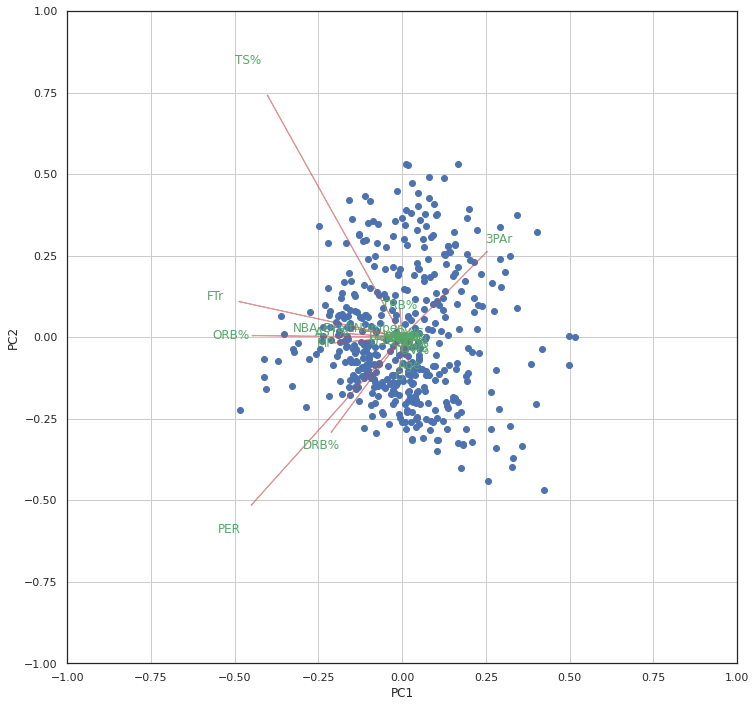

In [138]:
biplot(dataPca, pca.components_, 0, 1, pcaD.columns)

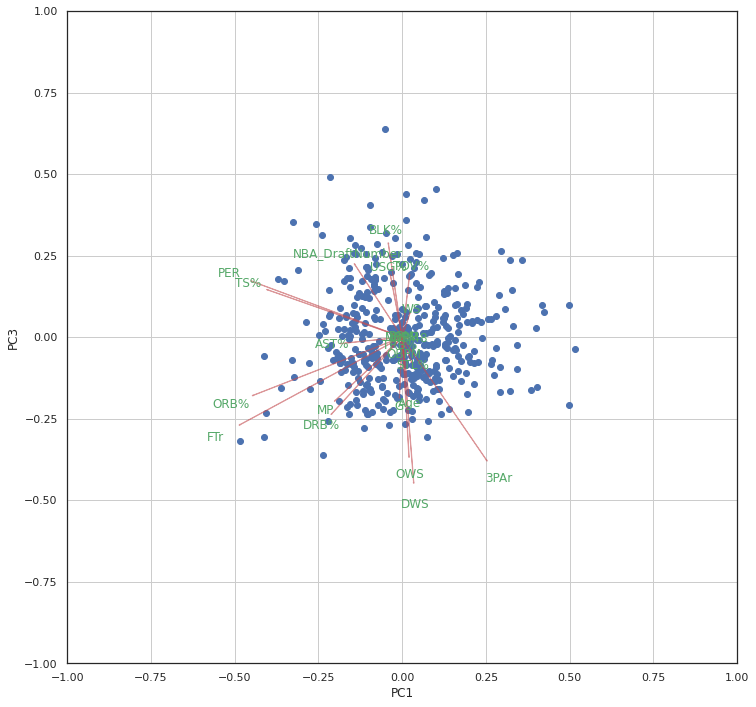

In [139]:
biplot(dataPca, pca.components_, 0, 2, pcaD.columns)

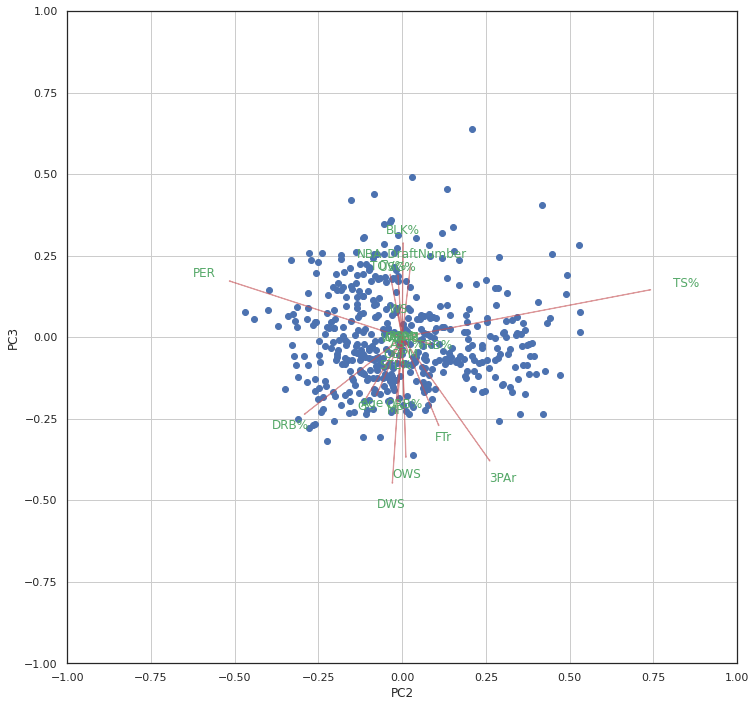

In [140]:
biplot(dataPca, pca.components_, 1, 2, pcaD.columns)

De aquí podemos decir que:


*   El PC1 representa negativamente el ORB%, FTr, TS% y el PER. Puede verse como un estimador de la calidad y la capacidad ofensiva que tiene, por esto no sorprende que sea el componente con mayor varianza explicada.
*   El PC2 explica positivamente el TS%, incluso con más fuerza que el PC1. Y negativamente el PER, también con más fuerza que el PC1. Es un indicador más centrado en la eficiencia de un jugador ofensivo.
*   Del PC3 se puede destacar que representa negativamente el OWS, el DWS y 3PAr. Podría decirse que estima lo determinante (OWS y DWS) y arriesgado (3PAr) que puede ser un jugador.



# Clustering

Vamos a realizar operaciones de **clustering** con el fin de obtener un entendimiento de los datos a través del particionamiento del dataset en grupos de instancias.


### Estructuración de datos

Utilizaremos los componentes generados por el proceso de PCA y concatenamos el salario para tambien tenerlo en cuenta.

In [141]:
sal = salaries.loc[X.index, ["Salary"]]
scaler.fit(sal)
sal = pd.DataFrame(scaler.transform(sal), columns=["Salary"], index=X.index)
data = pd.DataFrame(dataPca, index=X.index)
data["salary"] = sal["Salary"]
data.columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'salary']

Luego importamos todos los servicios necesarios.

In [142]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_samples, silhouette_score, calinski_harabaz_score
from collections import Counter
import math
import itertools
# kmeans.inertia_
# kmeans.init

## Determinación del K

Usaremos diferentes técnicas para obtener una nocion del K optimo según el conjunto de datos.

### Codo

A partir de los valores de WSS (- Within Sum of Squares) se puede crear el plot para aplicar la técnica del codo, creando un clustering para diferentes valores de K. Veamos, según el método del codo, cual sería el valor del K en este conjunto de datos

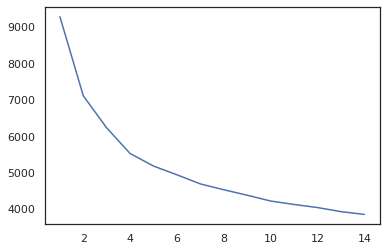

In [143]:
WSSs = []
for i in range(1,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data)
    WSSs.append(km.inertia_)
plt.plot(range(1, 15), WSSs)

Con K=4 encontramos aproximadamente el codo.

### Calinski-Harabasz

Obtengamos ahora la métrica de Calinski-Harabasz

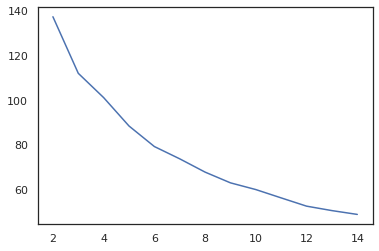

In [144]:
CHs = []
for i in range(2,15) :
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(data)
    CH = calinski_harabaz_score(dataPca, km.labels_) 
    CHs.append(CH)
plt.plot(range(2, 15), CHs)

Según este criterio se tiene mayor score con K=2 lo que no es muy coherente para este caso, pues 2 conjuntos no nos servirian mucho para sacar conclusiones. Entonces, sería interesante analizar que pasa con K=3, 4 Y 5 para así elegir alguno de ellos.

### Silueta

Veamos ahora con el método de silueta cuántos clusters deberíamos tener. Obtengamos las siluetas para k = 3, 4 y 5. De esta manera podremos tomar una decision mas precisa.

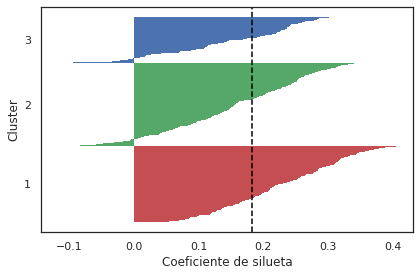

In [145]:
k=3
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(data)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataPca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'o']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

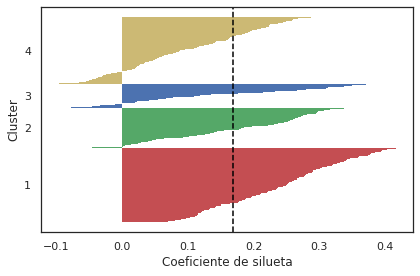

In [146]:
k=4
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(data)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataPca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'black']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

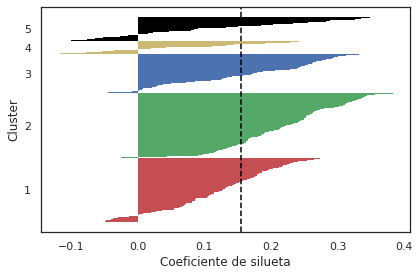

In [147]:
k=5
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
kmeans.fit(data)
y_clusters = kmeans.labels_
cluster_labels = np.unique(y_clusters)

silueta_puntos= silhouette_samples(dataPca, y_clusters, metric='euclidean')

y_ax_lower, y_ax_upper = 0, 0
yticks = []
colores = ['r', 'g', 'b', 'y', 'black']
for i, c in enumerate(cluster_labels):
    silueta_puntos_c = silueta_puntos[y_clusters == c]
    silueta_puntos_c.sort()
    y_ax_upper += len(silueta_puntos_c)
    color = colores[i]
    plt.barh(range(y_ax_lower, y_ax_upper), silueta_puntos_c, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(silueta_puntos_c)
    
silueta_promedio = np.mean(silueta_puntos)
plt.axvline(silueta_promedio, color="black", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')

plt.tight_layout()
# plt.savefig('./figures/silhouette.png', dpi=300)
plt.show()

Para el metodo de la silueta tendremos en cuenta que si muchos puntos tienen un valor bajo o negativo, entonces la configuración de cúmulos puede tener demasiados o muy pocos cúmulos. Entonces, elegiremos K=3 como el K final.

## Determinación de clusters

In [148]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(data.iloc[:,:-1])
clusters = kmeans.labels_
data['Cluster']= clusters
counter=Counter(clusters)
print(counter)

Counter({2: 178, 0: 167, 1: 99})


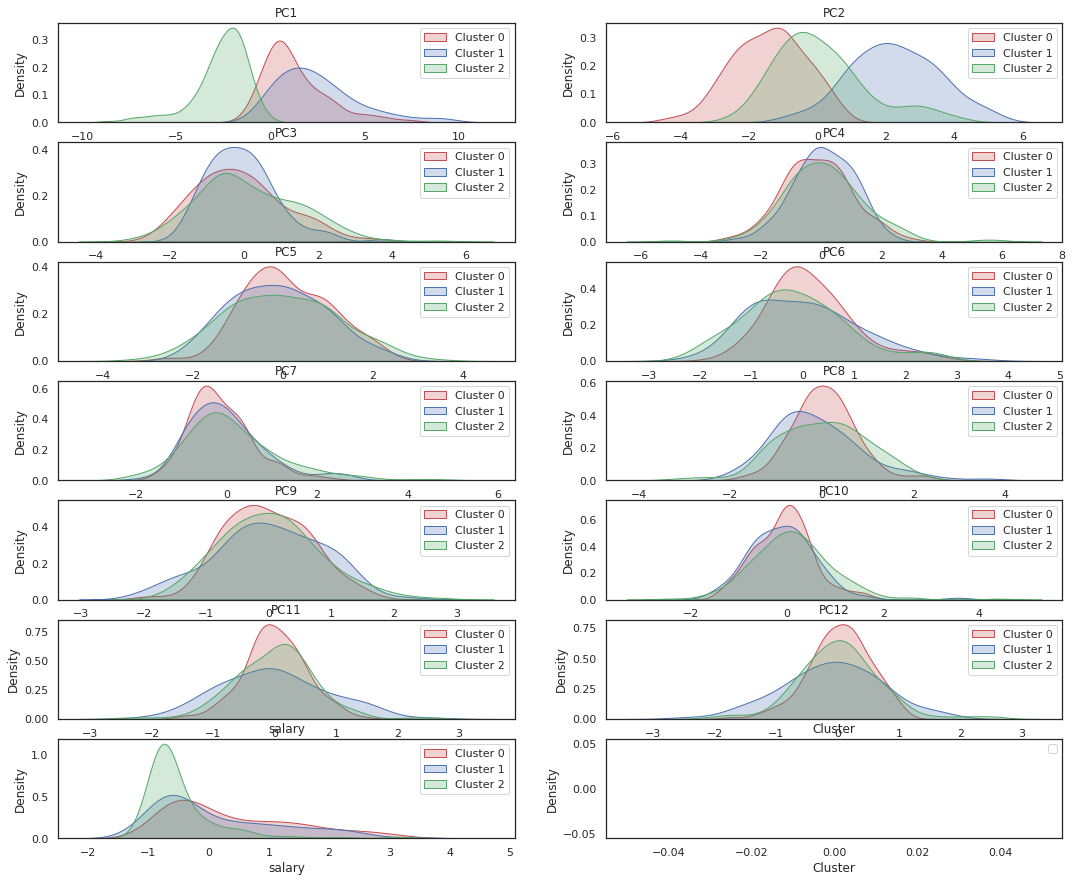

In [149]:
fig = plt.figure(figsize=(18,15))
i=1
for var in data.columns:
    ax = fig.add_subplot(math.ceil(13/2), 2, i)
    sns.kdeplot(data.loc[data.Cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(data.loc[data.Cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

En la distribución del PC1, podemos ver que el cluster más negativo es el 2. Lo cual nos dice que serán jugadores con menor calidad y capacidad ofensiva, ya que el PC1 tiene una relación negativa con este aspecto. Contrario a lo que sucede con los clusters 0 y 1. Vemos que en el PC2, el cluster 1 es más positivo, lo cual nos dice que son jugadores más eficientes que el cluster 0. Además, vemos que los jugadores del cluster 2 son los que menos cobran, tiene mucho sentido.

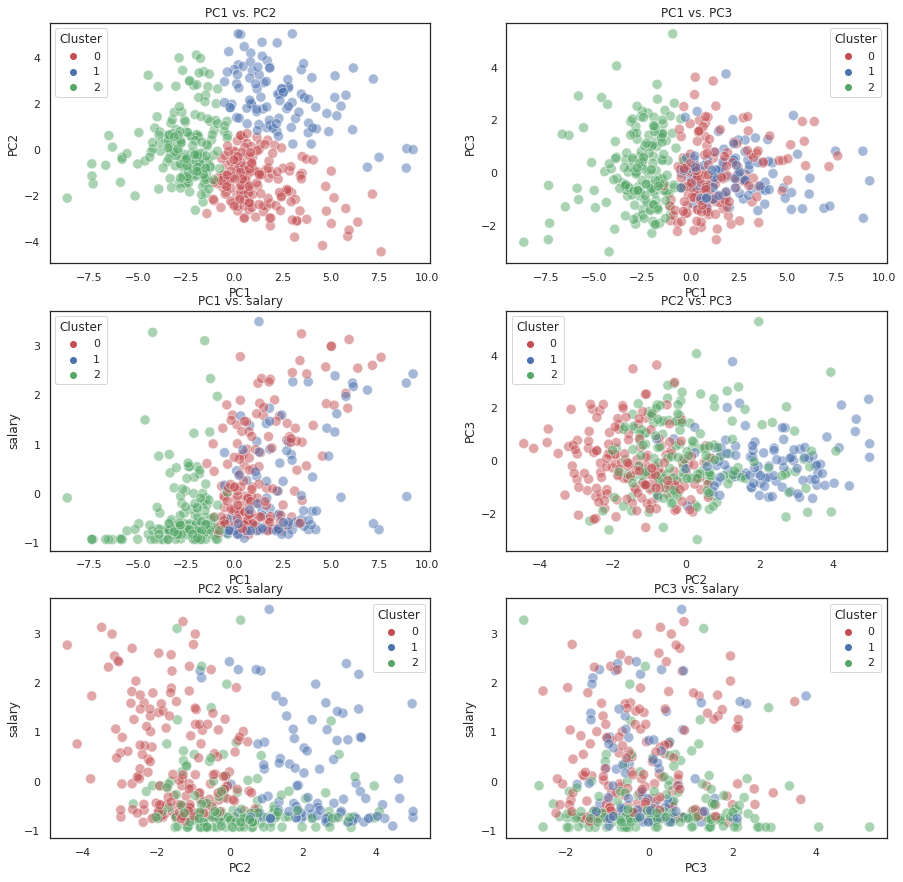

In [150]:
fig = plt.figure(figsize=(15,15))
colorPalette = ["r", "b", "g"]
i=1
pairs = list(itertools.combinations(["PC1", "PC2", "PC3", "salary"], 2)) 
for var1, var2 in pairs:
    if var1 != var2:
      ax = fig.add_subplot(math.ceil(5/2), 2, i)
      sns.scatterplot(x=var1, y=var2, hue="Cluster", data=data, ax=ax, palette=colorPalette, s=100, alpha=0.5)
      plt.title(var1 +" vs. " +var2)
      i+=1

Vemos cómo el PC1 vs PC2 separa perfectamente los clusters.

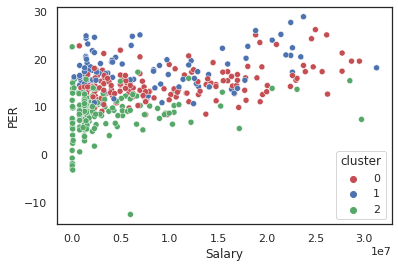

In [151]:
salaries = salaries.loc[~salaries.index.isin(indicesAQuitar)]
salaries["cluster"] = clusters
sns.scatterplot(x="Salary", y="PER", hue="cluster", data=salaries, palette=colorPalette)

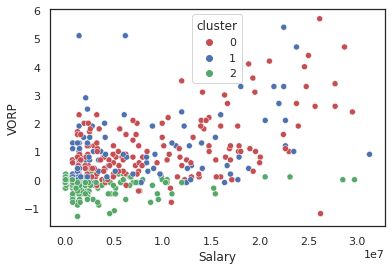

In [152]:
sns.scatterplot(x="Salary", y="VORP", hue="cluster", data=salaries, palette=colorPalette)

Vemos que los jugadores del cluster 2 están relegados en una zona, confirmando nuestras hipótesis. Los del cluster 1 terminan teniendo una mejor calidad y un mayor salario que los del cluster 0.

In [153]:
X = X.iloc[:,:24]
X["Salary"] = data["salary"]
X["cluster"]= clusters

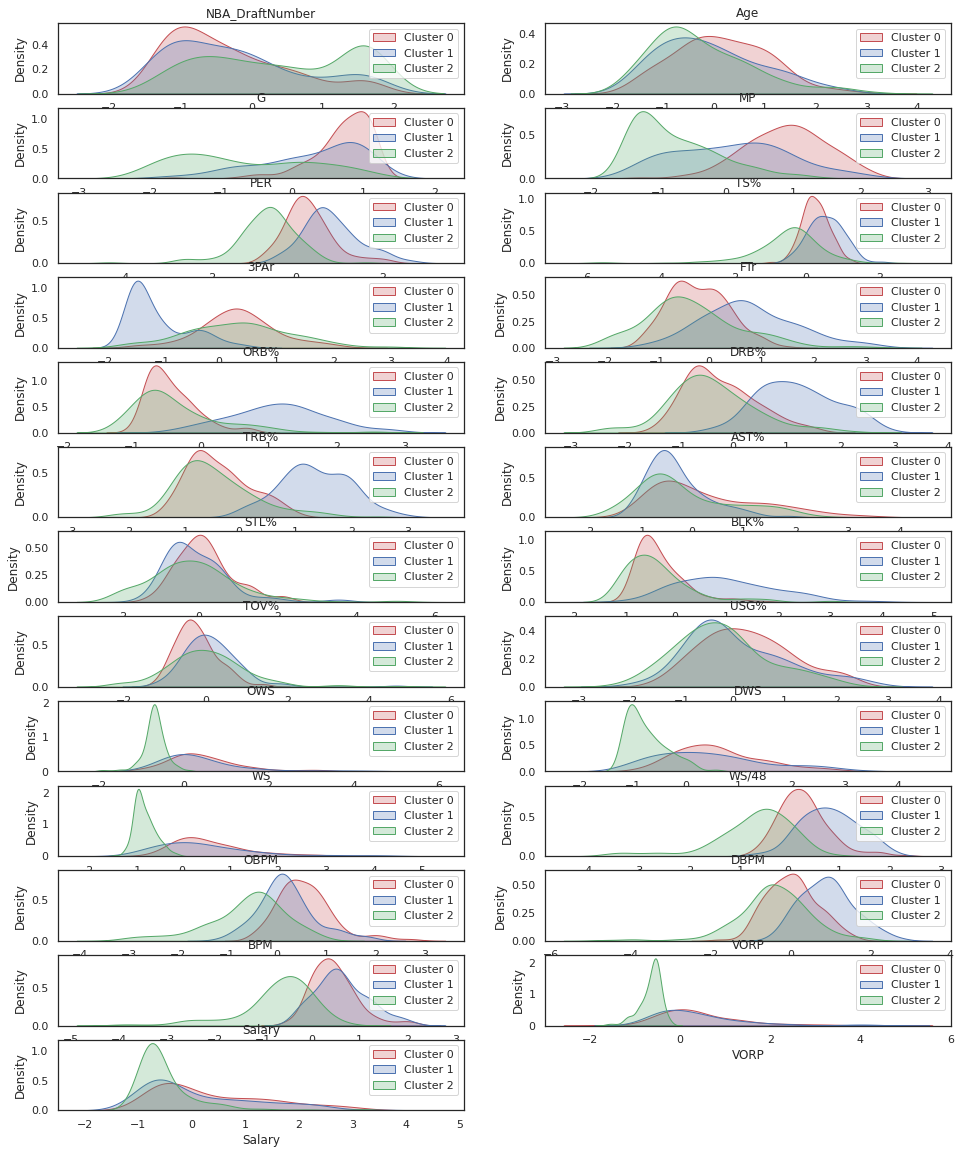

In [154]:
fig = plt.figure(figsize=(16,20))
i=1
for var in X.columns[:25]:
    ax = fig.add_subplot(math.ceil(26/2), 2, i)
    sns.kdeplot(X.loc[X.cluster==0][var], shade=True, color='r', ax=ax);
    sns.kdeplot(X.loc[X.cluster==1][var], shade=True, color='b', ax=ax);
    sns.kdeplot(X.loc[X.cluster==2][var], shade=True, color='g', ax=ax);
    plt.title(var)
    plt.legend(['Cluster 0', 'Cluster 1', 'Cluster 2'])
    i+=1

En conclusión, podemos caracterizar a los jugadores de la siguiente manera:

> Cluster 0: son jugadores entre mediana y alta calidad, suelen jugar muchos partidos. Podría decirse que no suelen destacar mucho, pero son lo suficientemente buenos como para jugar toda la temporada.

> Cluster 1: jugadores con muy alto rendimiento, están en su prime y son All-Stars. Son los que más dinero ganan.

> Cluster 2: son jugadores de calidad promedio, cobran y juegan poco, tienen bajas estadísticas en general. Estos pueden ser Rookies inexpertos o ex All-Stars. Aquí caen la mayoría de los jugadores.